# Análisis del dataset
Este archivo imprime datos relevantes para la comprensión del dataset con el que se estará trabajando

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsk
from wordcloud import WordCloud


## 1. Configuración de estilo

In [9]:


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)



## 2. Cargar el dataset y mostrar información básica

In [11]:

try:
    df = pd.read_csv('recursos/news.csv')
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'news.csv' no se encuentra en el directorio actual.")
    exit()

# Mostrar información básica del dataset
print("\nInformación básica del dataset:")
print(df.info())



Dataset cargado exitosamente.

Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   news         1213 non-null   object
 1   Type         1217 non-null   object
 2   news_limpio  1213 non-null   object
dtypes: object(3)
memory usage: 28.7+ KB
None


## 3. Calcular el número promedio de palabras por noticia

In [12]:

print("\nCalculando estadísticas de longitud de texto...")
df['word_count'] = df['news'].apply(lambda x: len(str(x).split()))
average_words = df['word_count'].mean()
median_words = df['word_count'].median()
max_words = df['word_count'].max()
min_words = df['word_count'].min()

print(f"\nEstadísticas de longitud de texto:")
print(f"- Promedio de palabras por noticia: {average_words:.2f}")
print(f"- Mediana de palabras por noticia: {median_words}")
print(f"- Máximo de palabras en una noticia: {max_words}")
print(f"- Mínimo de palabras en una noticia: {min_words}")




Calculando estadísticas de longitud de texto...

Estadísticas de longitud de texto:
- Promedio de palabras por noticia: 516.55
- Mediana de palabras por noticia: 445.0
- Máximo de palabras en una noticia: 2964
- Mínimo de palabras en una noticia: 1



----
## 4. Análisis de las categorías

In [13]:
print("\nAnálisis de categorías:")
categories = df['Type'].unique()
num_categories = len(categories)
print(f"Número de categorías distintas: {num_categories}")
print("Categorías encontradas:", categories)



Análisis de categorías:
Número de categorías distintas: 7
Categorías encontradas: ['Otra' 'Regulaciones' 'Alianzas' 'Macroeconomia' 'Innovacion'
 'Sostenibilidad' 'Reputacion']


## 5. Número de noticias por tipo


Distribución de muestras por categoría:
Type
Macroeconomia     340
Alianzas          247
Innovacion        195
Regulaciones      142
Sostenibilidad    137
Otra              130
Reputacion         26
Name: count, dtype: int64


C:\Users\naomi\AppData\Local\Temp\ipykernel_15760\3646510642.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Type', order=df['Type'].value_counts().index, palette='viridis')


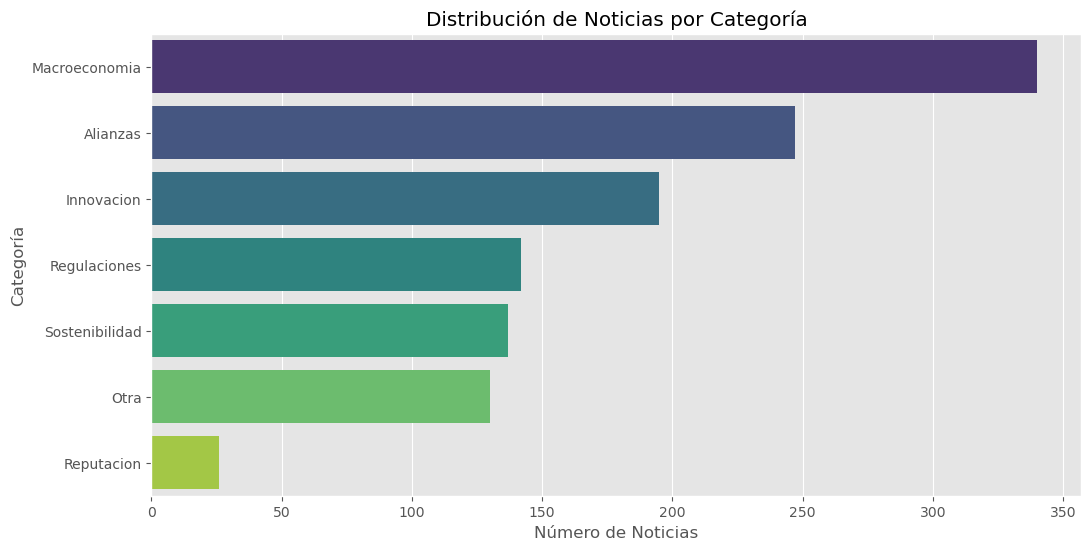

In [15]:

# Distribución de muestras por categoría
category_dist = df['Type'].value_counts()
print("\nDistribución de muestras por categoría:")
print(category_dist)


# Gráfico de distribución de muestras por categoría
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Type', order=df['Type'].value_counts().index, palette='viridis')
plt.title('Distribución de Noticias por Categoría')
plt.xlabel('Número de Noticias')
plt.ylabel('Categoría')
plt.show()

## 6. Análisis de longitud de las noticias

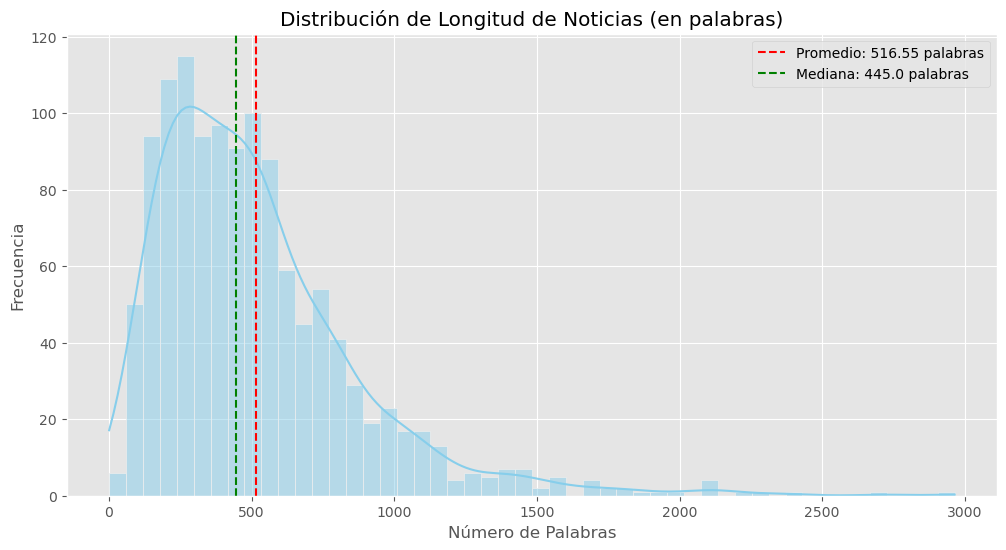

In [16]:


# Gráfico de distribución de longitud de palabras
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color='skyblue')
plt.axvline(average_words, color='red', linestyle='--', label=f'Promedio: {average_words:.2f} palabras')
plt.axvline(median_words, color='green', linestyle='--', label=f'Mediana: {median_words} palabras')
plt.title('Distribución de Longitud de Noticias (en palabras)')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



C:\Users\naomi\AppData\Local\Temp\ipykernel_15760\2432057204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='word_count', y='Type', palette='Set2')


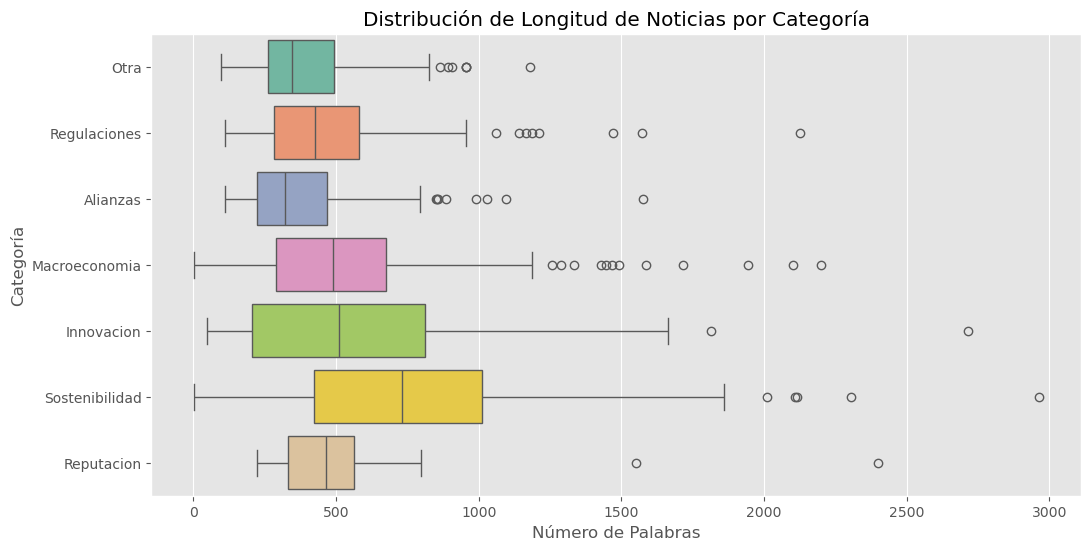

In [18]:


# Boxplot de longitud por categoría
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='word_count', y='Type', palette='Set2')
plt.title('Distribución de Longitud de Noticias por Categoría')
plt.xlabel('Número de Palabras')
plt.ylabel('Categoría')
plt.show()



## 7. Análisis de palabras más comuner por clase


Generando WordCloud para la categoría: Otra


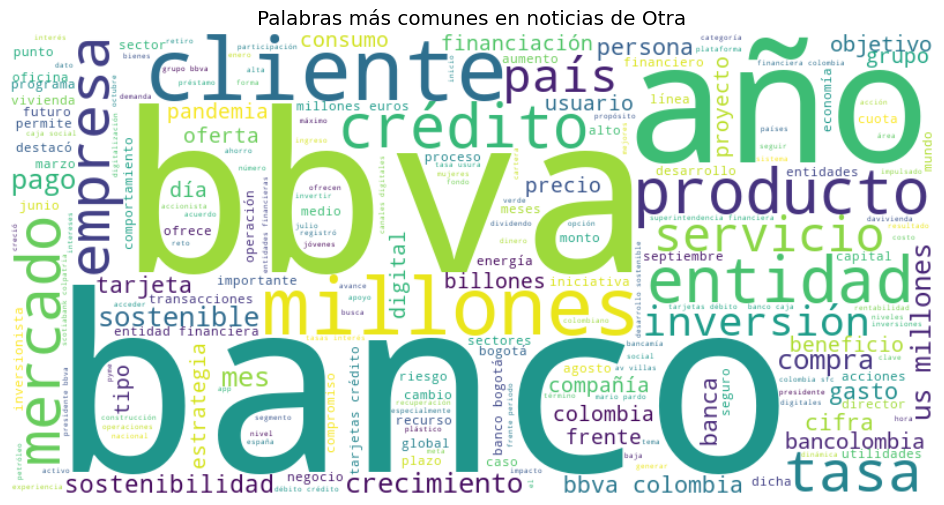


Generando WordCloud para la categoría: Regulaciones


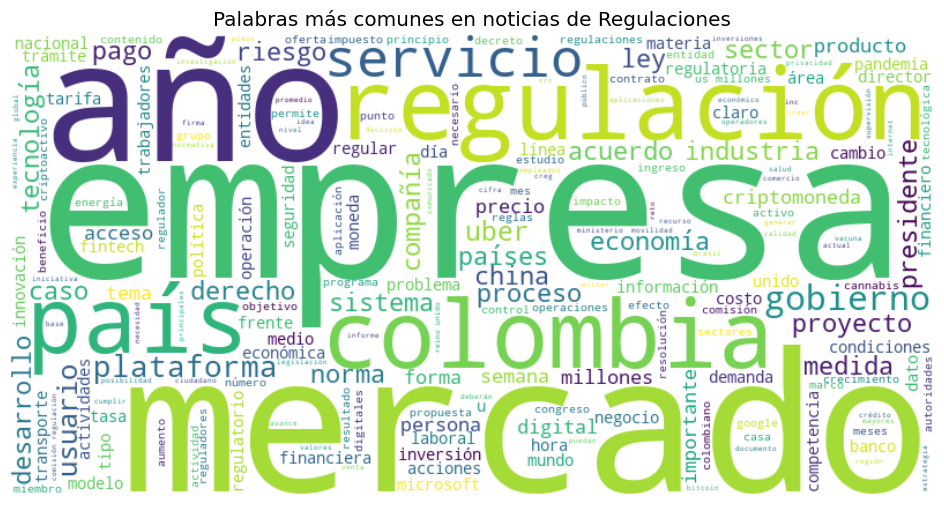


Generando WordCloud para la categoría: Alianzas


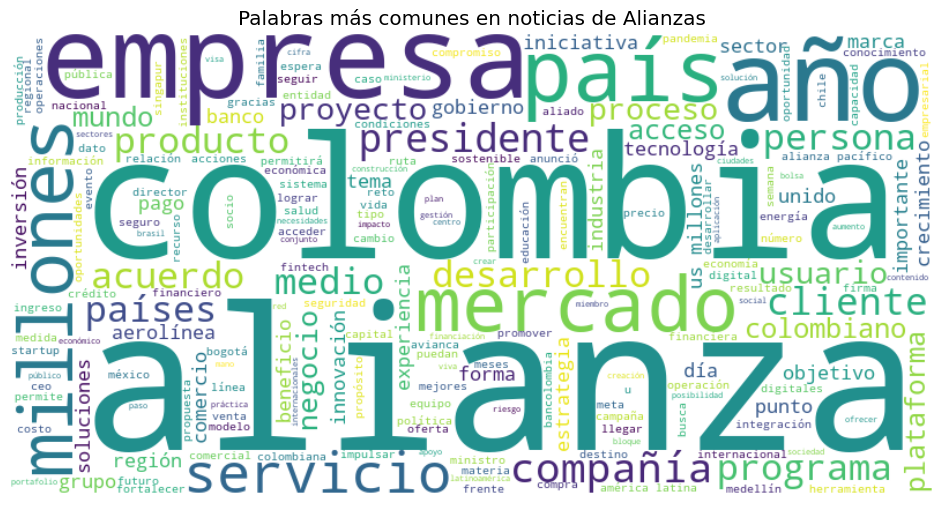


Generando WordCloud para la categoría: Macroeconomia


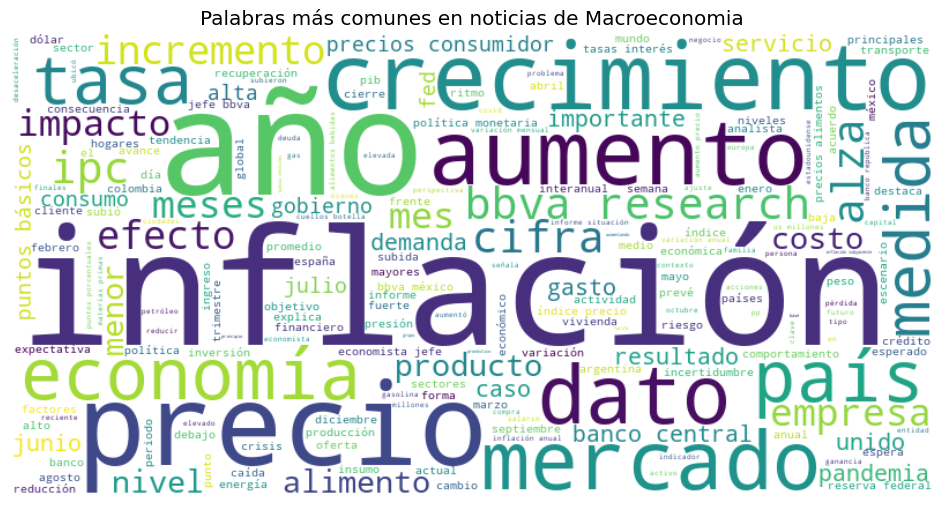


Generando WordCloud para la categoría: Innovacion


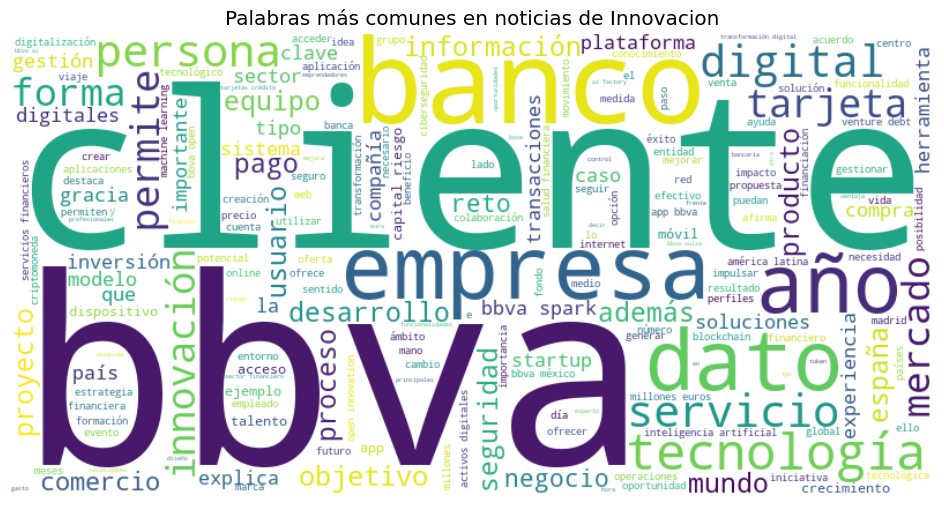


Generando WordCloud para la categoría: Sostenibilidad


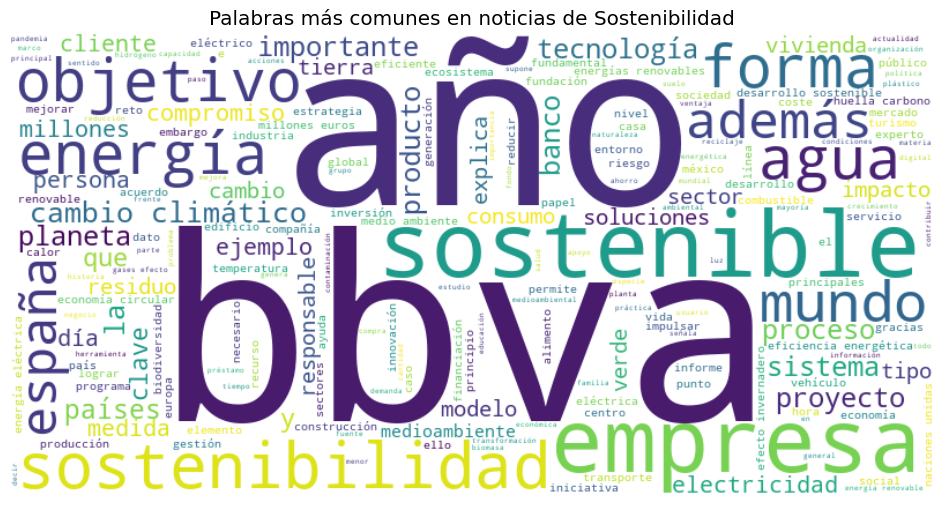


Generando WordCloud para la categoría: Reputacion


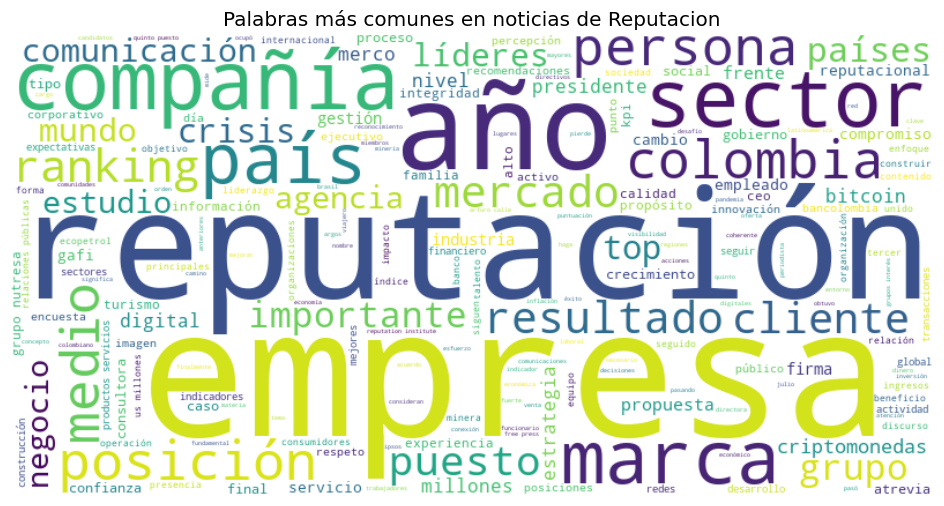

In [20]:


# WordCloud para ver palabras más comunes (ejemplo con la primera categoría)
if num_categories > 0:
    for i in range(7):  # Generar WordCloud para las primeras 3 categorías
        sample_category = categories[i]
        print(f"\nGenerando WordCloud para la categoría: {sample_category}")
        
        text = ' '.join(df[df['Type'] == sample_category]['news_limpio'].astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Palabras más comunes en noticias de {sample_category}')
        plt.show()